# Problem Statement: 

Predict the attrition (Yes/No) of employees and what factors are significantly impacting it, and finally provide some suggestions on how to mitigate the attrition.  

# Questions: 

1. What is the likelihood of an active employee leaving the company? 

2. What are the key indicators of an employee leaving the company? 

3. How does worklifebalance vary with marital status and what is the connection to attrition of those employees?

4. What policies or strategies can be adopted based on the results to improve employee retention? (e.g. which groups of employees can the HR team focus measures like Overtime on?). 

# Stakeholders

Primary stakeholders- *HR Team of the company (IBM)*

They should be able to understand what factors contribute to attrition and take some steps towards improving the situation based 
on the model results and final recommendations

# Business metrics: 

**1. Predict Attrition class with 80% accuracy** 

**2. Identify focus groups to improve work-life balance of employees by 10%**  
    Note: Improvement will happen over time- after utilizing insights from the model to take suitable corrective actions for   improving the above metrics
    
**3. Identify 5 important features to reduce employee attrition in the organization.**

# Data science metric: 

Accuracy of the model on training and test data.


# Data Acquisition

**IBM HR Analytics Employee Attrition & Performance Dataset**

<a href="https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset" target="_blank">Kaggle Link to Dataset</a>


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization of pairplot, histogram
import matplotlib.pyplot as plt #managing size of visualizations
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#Import statements for sci-kit learn required for RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (accuracy_score, log_loss, classification_report, confusion_matrix)
from sklearn.model_selection import train_test_split # Import the train_test_split method

#Import Imbalanced Learn library
from imblearn.over_sampling import SMOTE


#Import plotly for creating interactive visualizations
import plotly.express as px
# Import and suppress warnings (not errors, just deprecation etc. warnings that wont affect execution)
import warnings
warnings.filterwarnings('ignore')

In [2]:
attrition = pd.read_csv('IBM Attrition Dataset.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Looking for NaN
display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [4]:
# Define a dictionary for the target variable mapping- Convert Yes ot 1 and No to 0
target_map = {'Yes':1, 'No':0}
# Use the pandas 'apply' method to numerically encode the attrition target variable
#Each row's Yes/No value is x, and lambda is 'anonymous function' which checks dictionary for the correct value 1/0 based on x
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

# Create data frame for target variable consisting of index and Attrition_numerical values. We will use this to create 
#test and training data of target for the model
target = attrition["Attrition_numerical"]
target.head(3)

0    1
1    0
2    1
Name: Attrition_numerical, dtype: int64

In [5]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


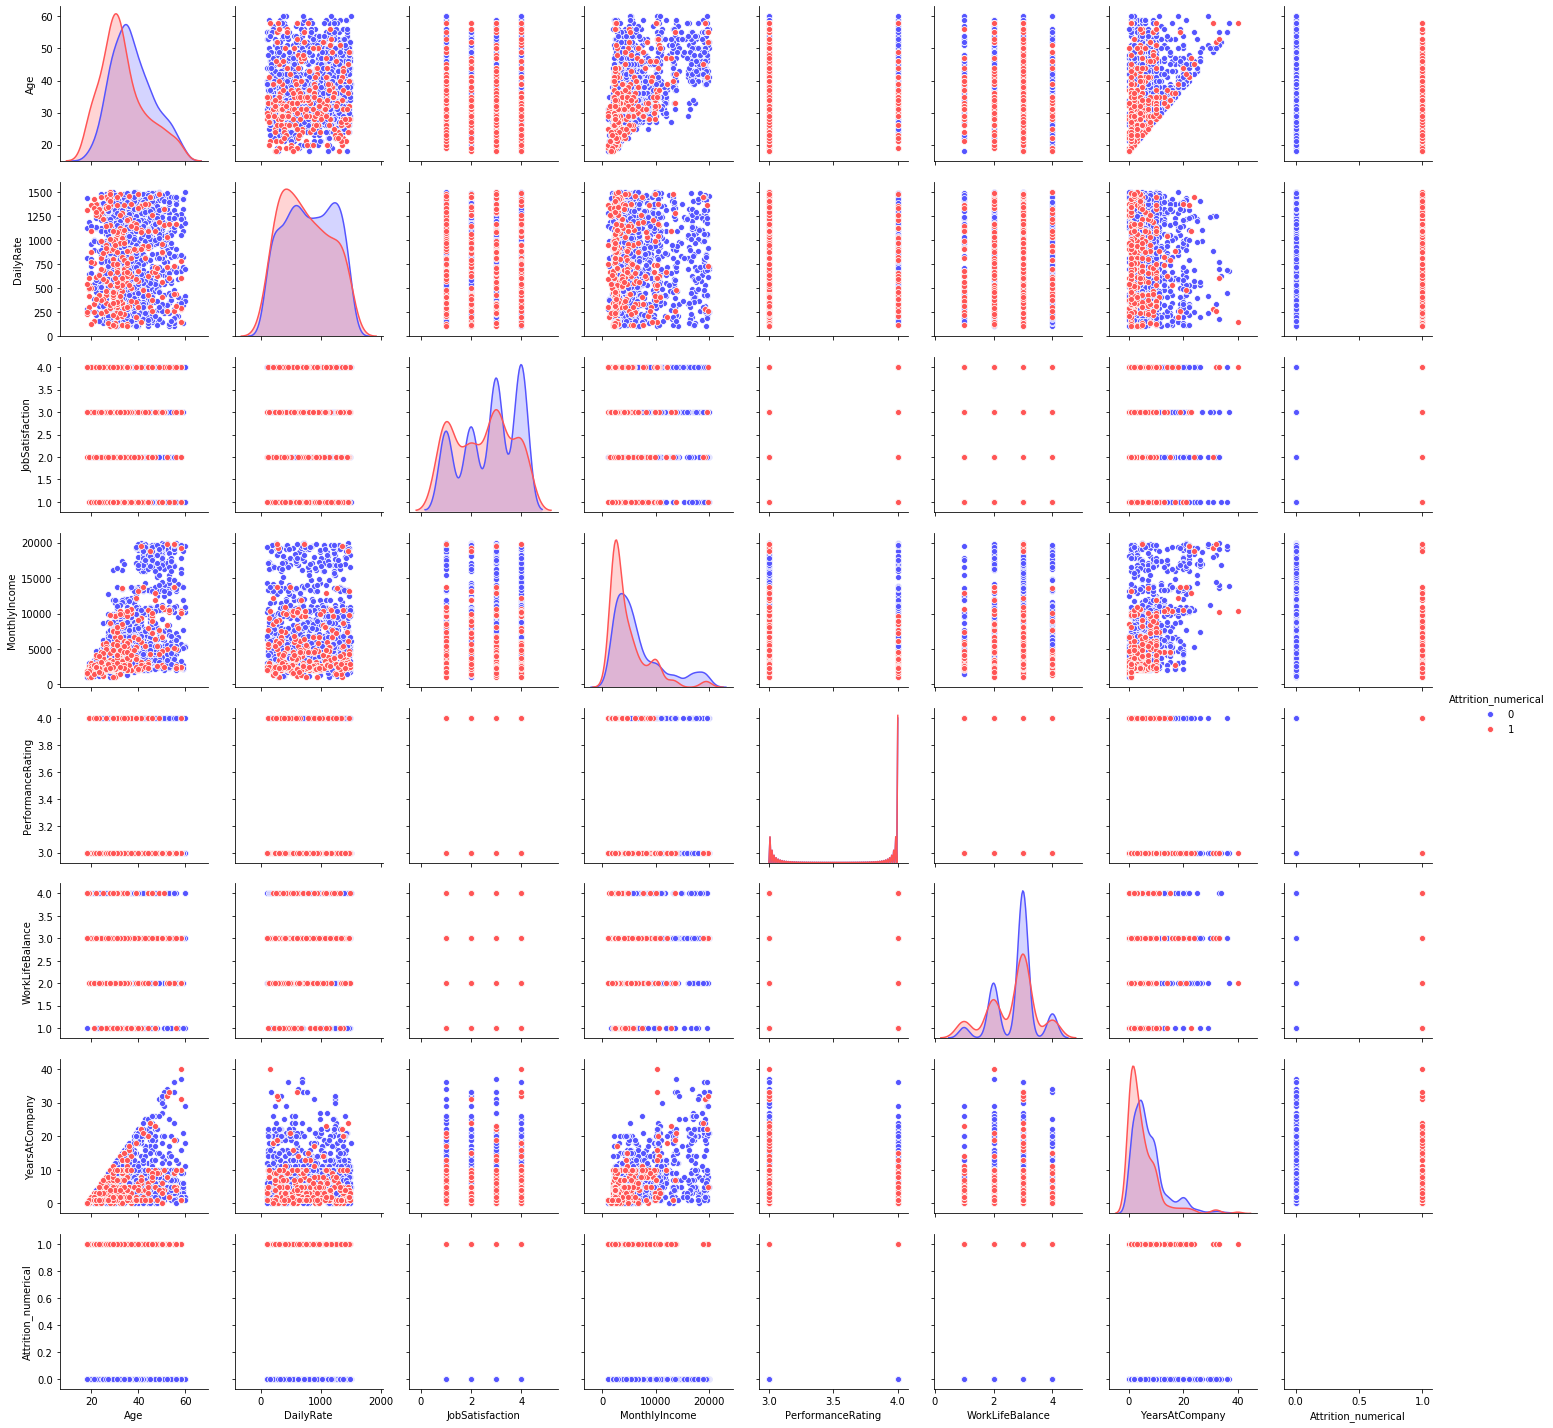

In [6]:

#Creating pairplots of some of the variables to understand more about the data
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

#Hue helps us split the data based on Yes Attrition (Red) and No Attrition (Blue)
g = sns.pairplot(attrition[numerical], hue='Attrition_numerical', palette='seismic',  diag_kind = 'kde',diag_kws=dict(shade=True))


# Feature Selection

1. Eliminate features that have no impact on classification
2. Identify Features that are highly correlated with each other (**HEATMAP visualization**)

In [7]:
"""
Feature Selection
"""

#Dropping columns with data fields having constant values as they can't distinguish between classes of Yes/No
attrition = attrition.drop(['Over18','StandardHours','EmployeeCount'], axis=1,errors='ignore')

"""
Creating a heatmap of correlation matrix to identify highly correlated numerical features

"""

# Empty list called categorical to store columns with categorical data
categorical = []
for col, value in attrition.iteritems(): # For each column, examine the types of values stored in them
    if value.dtype == 'object': #means if the values for a column are string objects (text, like Travel_Frequently, Travel_Rarely)
        categorical.append(col) #Add to list of categorical attributes


# Store the numerical columns (i.e. remaining columns of attrition dataset) in a list- numerical
numerical = attrition.columns.difference(categorical)

print('Numerical attributes:\n', numerical)
print('Categorical attributes:\n',categorical) #categorical variables with categorical values 

# Store the numerical features and data in a dataframe attrition_num
attrition_num = attrition[numerical]

# Store the categorical data in a dataframe attrition_cat (for creating dummy variables later)
attrition_cat = attrition[categorical]


#Using plotly for interactive heatmap, pandas .corr() to find correlation coefficient of numerical attributes
data = [
    go.Heatmap(
        z= attrition[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=attrition[numerical].columns.values, #Column i.e. feature values
        y=attrition[numerical].columns.values, #Column i.e. feature values
        colorscale='Greens', # To show only shades of green colour. We could use other palettes with multiple colours
        reversescale = False, # To darken values that are large, and keep light colour for values that are small 
        opacity = 1.0 #for opaque colour 
        
    )
]

#Set title for heatmap, set labels
layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36), #We dont need tick marks for each variable on the heatmap, specifying 36 variables
    yaxis = dict(ticks='' ), #We dont need tick marks for each variable on the heatmap
    width = 900, height = 700, #Width and height 
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')


Numerical attributes:
 Index(['Age', 'Attrition_numerical', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Categorical attributes:
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [8]:
"""
Feature Selection continued

"""

#Drop columns with Pearson's correlation coefficient above 0.9, based on correlation matrix
#From correlation matrix we see coefficient= 0.95 for MonthlyIncome and JobLevel, so dropping JobLevel
attrition_num = attrition_num.drop(['JobLevel'], axis=1,errors='ignore') #JobLevel is a categorical column

# Drop the categorical target column Attrition- We have created target frame for it already
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) 

# Drop the Attrition_numerical column from attrition dataset - We have created target frame for it already
attrition_num = attrition_num.drop(['Attrition_numerical'], axis=1,errors='ignore')


# Data Transformation

* Since the dataset has several nominal features that have 3-4 different categories each, we will use dummy variables to encode these features. **Sci-kit learn library is not able to handle categorical variables without encoding, though Random Forest is able to work with such variables.**
* If we encode values in the feature as 0,1,2, etc. then the mathematical model may assume that 2 is greater than 1, even though there is no underlying numerical significance to the categories.
E.g. Business Travel feature has 3 categories-Non-Travel, Travel_Frequently, Travel_Rarely.

In [9]:
#Create dummy variables and populate using pandas' get_dummies() function
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)
# get_dummies() is making categorical basis alphabetical order of occurence of jobroles etc. Not based on 'yes=1/n=0' which is what we need for target variable
# That's why we had mapped target separately using apply() function

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [10]:
# Concat the two dataframes together columnwise
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
attrition_final
#Initially we had 35 columns. We added attrition_numerical. Then encoded other categorical variables. Final count of attributes- 51.

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,2,3,61,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,4,92,2,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,5,4,56,3,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,7,1,40,3,2,3468,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,4,2571,...,0,0,0,0,0,0,1,0,1,0
1466,39,613,6,1,2062,4,42,2,1,9991,...,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,3,2064,2,87,4,2,6142,...,1,0,0,0,0,0,1,0,0,1
1468,49,1023,2,3,2065,4,63,2,2,5390,...,0,0,0,1,0,0,1,0,1,0


In [11]:
#Check whether target variable in dataset is balanced or not

data = [go.Bar(
            x=attrition["Attrition"].value_counts().index.values,
            y= attrition["Attrition"].value_counts().values
    )]
#value_counts() function will count no. of occurences of values in the column
#value_counts().index function will set the type of values in the column (here its 2- yes and no.)

py.iplot(data, filename='basic-bar')

### 70-30 split for Training and Testing

In [12]:
"""
Splitting into train and test sets

"""
# Split data into train and test sets for training model and testing the model's classification capability

train, test, target_train, target_val = train_test_split(attrition_final, 
                                                         target, 
                                                         train_size= 0.70,
                                                         random_state=0);
#passing the dataset of training (all features except target), the target dataset (attrition_numerical)
#specifying training size in percentage i.e. 80% of the dataset should be used for training. Automatically remaining 20% will be for testing
#Random_seed=0 ensures that while random selection is happening for , each time we run the code the same random selection is repeated
#Otherwise every time we run the code a different training and testing set will be created

train

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
338,30,570,5,3,456,4,30,2,3,6118,...,0,0,0,1,0,1,0,0,1,0
363,33,350,5,3,485,4,34,3,3,2851,...,0,0,0,0,1,0,0,1,0,1
759,45,788,24,4,1049,2,36,3,2,2177,...,0,0,0,0,0,0,0,1,1,0
793,28,895,15,2,1102,1,50,3,3,2207,...,0,0,0,0,0,1,0,0,1,0
581,30,921,1,3,806,4,38,1,3,3833,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,34,1333,10,4,1055,3,87,3,3,2220,...,0,0,0,0,1,0,1,0,0,1
835,35,528,8,4,1164,3,100,3,3,4323,...,0,0,0,0,0,0,0,1,1,0
1216,43,1179,2,3,1706,4,73,3,4,7847,...,0,0,0,1,0,0,1,0,0,1
559,38,268,2,5,773,4,92,3,3,3057,...,0,0,1,0,0,0,1,0,0,1


In [13]:
test

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
442,36,635,10,4,592,2,32,3,4,9980,...,0,0,0,1,0,0,0,1,1,0
1091,33,575,25,3,1545,4,44,2,2,4320,...,1,0,0,0,0,0,0,1,1,0
981,35,662,18,4,1380,4,67,3,3,4614,...,0,0,0,1,0,0,1,0,0,1
785,40,1492,20,4,1092,1,61,3,4,10322,...,0,0,0,0,0,0,1,0,1,0
1332,29,459,24,2,1868,4,73,2,4,2439,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,36,217,18,4,1133,1,78,3,4,7779,...,1,0,0,0,0,0,0,1,1,0
399,31,329,1,2,530,4,98,2,1,2218,...,0,0,0,0,0,0,1,0,1,0
458,40,1094,28,3,615,3,58,1,1,10932,...,0,0,0,1,0,1,0,0,1,0
406,52,319,3,3,543,4,39,2,3,7969,...,1,0,0,0,0,0,1,0,0,1


In [14]:
target_train

338     0
363     1
759     0
793     0
581     0
       ..
763     0
835     0
1216    0
559     0
684     0
Name: Attrition_numerical, Length: 1029, dtype: int64

## Class Imbalance Correction: Minority ('Yes' class) Oversampling

* Using SMOTE to create more samples of Yes class so that model is able to train better for Yes class, instead of having only majority of No class samples.
* Applied only to training data, else same samples may leak to testing data, leading to inflated accuracy on testing data

In [15]:
"""
Oversampling 

"""
#Oversampling by Synthetic Minority Oversampling Technique (SMOTE)
#Needed as we have 1233 NO's but only 237 YES's for attrition. Additionally, for this problem, the Yes attrition cases are more important.

oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(train,target_train)

In [16]:
#Check whether target variable in dataset is balanced or not after SMOTE
data = [go.Bar(
            x=smote_target.value_counts().index.values,
            y= smote_target.value_counts().values
    )]

py.iplot(data, filename='basic-bar')
# Plot shows us equal no. of Yes and No records, so its confirmed that more records of minority Yes class have been added to dataset

# Applying Random Forest Algorithm

In [17]:
"""
Applying Random Forest Algorithm on dataset

"""

# Random Forest parameters
rf_params = {
        'n_jobs': -1, #Allow running the jobs like fit, predict etc. in parallel on all the trees in the forest.
                      #Otherwise the model will take a lot more time 
        'n_estimators': 1000, # Number of decision trees (more the trees, more complexity. No fixed ideal number of trees)
        'min_samples_leaf': 20, # Min. no. of data points that should be there in terminal/leaf node
        'max_features' : 'auto', # Number of features to consider when looking for the best split at each node, by default square root of no. of features (so for us, sqrt of 51).
                                 # More max_features, the better, but the more time and complexity to solve.
        'random_state' : 0, # We set random state to zero for reproducibility (each time we run the code the same random selection is repeated)
                            # Otherwise every time we run the code a different sequence of selection of random trees, so we will get different accuracy even though model is same
        'verbose': 0 # We dont want to see the 'time taken/no. of jobs'logs while the trees are getting constructed and their predictions are being combined
    }

In [18]:
#Initialize the RandomForest classifier

rf = RandomForestClassifier(**rf_params)

In [19]:
# Training model based on SMOTE training data
#We pass the training data (all features except target), and classify the the target data based on these features
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [20]:
# Applying model on test data to check prediction capability

rf_predictions_train_data = rf.predict(train)
print("Predictions finished for training data (without SMOTE)")

rf_predictions_smote_train_data = rf.predict(smote_train)
print("Predictions finished for training data (with SMOTE)")

rf_predictions = rf.predict(test)
print("Predictions finished for test data")

Predictions finished for training data (without SMOTE)
Predictions finished for training data (with SMOTE)
Predictions finished for test data


### Accuracy:
* It is the number of correct predictions made divided by the total number of predictions made, multiplied by 100.
* It is the fraction of predictions it made correctly.
* Since we have supervised learning, we are able to check how many times the model correctly predicts 'Yes' and 'No' attrition class that matches the class given in the train and test dataset.





In [21]:
"""
Analyse model accuracy in classification of attrition:

"""

#Using given training data rather than SMOTE data
print("="*70)
#Accuracy score rounded off to 3 decimal places using format() function
print("Accuracy score for Random Forest training data (without SMOTE): {:.3f}".format(accuracy_score(target_train, rf_predictions_train_data)))
print("="*70)
#print(classification_report(target_train, rf_predictions_train_data))


#Using SMOTE training data
print("Accuracy score for Random Forest training data (with SMOTE): {:.3f}".format(accuracy_score(smote_target, rf_predictions_smote_train_data)))
print("="*70)
#print(classification_report(target_train, rf_predictions_train_data))

print("Accuracy score for Random Forest test data: {:.3f}".format(accuracy_score(target_val, rf_predictions)))
# To find metrics beyond accuracy that can tell us about the model's capability for predicting for each class (Yes/No)
print("="*70)
print("Classification Report for Test Data:\n",("-"*70),"\n",classification_report(target_val, rf_predictions))
print()



Accuracy score for Random Forest training data (without SMOTE): 0.915
Accuracy score for Random Forest training data (with SMOTE): 0.935
Accuracy score for Random Forest test data: 0.866
Classification Report for Test Data:
 ---------------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       371
           1       0.60      0.46      0.52        70

    accuracy                           0.87       441
   macro avg       0.75      0.70      0.72       441
weighted avg       0.85      0.87      0.86       441




### Feature Importance: Random Forest

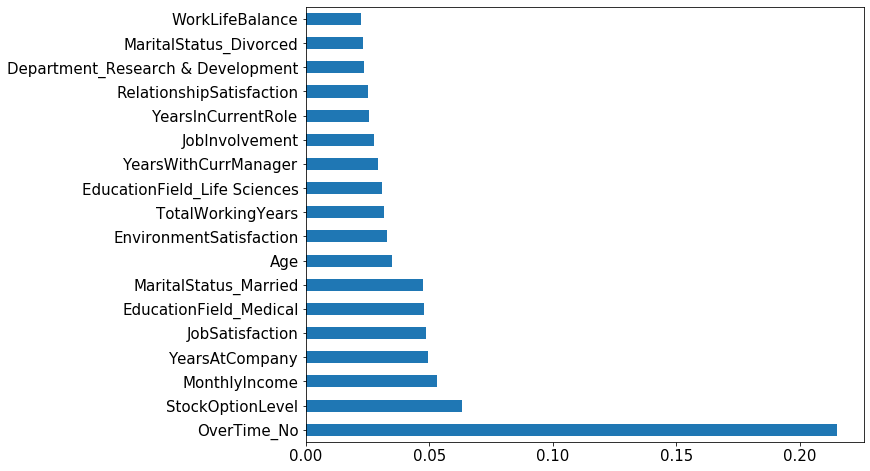

In [22]:
"""
Identify important features 

"""

#Random forest allocates feature importance for each feature (i.e. column) of training data
feat_importances = pd.Series(rf.feature_importances_, index=smote_train.columns)
#Retrieve the 10 most important features (out of 51) as per importance assigned by Random Forest
feat_importances = feat_importances.nlargest(18)
#Matplotlib plot() function to plot bar graph of the 18 feature names and corresponding importance
feat_importances.plot(kind='barh', fontsize=15, figsize=(10,8)) # horizontal bar graph


# Applying Logistic Regression Algorithm

In [23]:
logmodel = LogisticRegression(random_state=0,solver='liblinear')
logmodel.fit(smote_train, smote_target)

LogisticRegression(random_state=0, solver='liblinear')

In [24]:
lr_pred = logmodel.predict(test)

In [25]:
"""
Recursive Feature Elimination for Logistic Regression

"""


logreg = LogisticRegression(random_state=0,solver='liblinear')
rfe = RFE(logreg, 20)
rfe = rfe.fit(smote_train, smote_target)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False  True False False False  True  True  True  True  True  True
  True  True False False  True  True  True  True  True False  True  True
  True  True  True]
[28 31 25 18 32  8 26 11 13 29 30 22 20  4 15 14 24 19 10 23 16 17 21  1
 27  6  1  2  3  9  1  1  1  1  1  1  1  1  5  7  1  1  1  1  1 12  1  1
  1  1  1]


In [26]:
#Removing insignificant columns from SMOTE Training data based on RFE (columns with Ranking=1 will be retained)

cols_list=['BusinessTravel_Travel_Frequently',
'BusinessTravel_Travel_Rarely',
'BusinessTravel_Non-Travel',
'Department_Human Resources',
'Department_Research & Development',
'Department_Sales',
'EducationField_Life Sciences',
'EducationField_Marketing',
'EducationField_Medical',
'EducationField_Other',
'EducationField_Technical Degree',
'Gender_Female',
'Gender_Male',
'JobRole_Healthcare Representative',
'JobRole_Manager',
'JobRole_Manufacturing Director',
'JobRole_Research Director',
'MaritalStatus_Divorced',
'OverTime_No',
'OverTime_Yes']
X=smote_train[cols_list]
#Removing cols from test data
Y=test[cols_list]
#Removing cols from training data (without SMOTE)
X_training=train[cols_list]

In [27]:
# Checking P value to remove insignificant variables
import statsmodels.api as sm
logit_model=sm.Logit(smote_target,X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.459120
         Iterations 8
                                  Results: Logit
Model:                   Logit                   Pseudo R-squared:     0.338      
Dependent Variable:      Attrition_numerical     AIC:                  1623.0459  
Date:                    2020-11-24 09:03        BIC:                  1732.0939  
No. Observations:        1724                    Log-Likelihood:       -791.52    
Df Model:                19                      LL-Null:              -1195.0    
Df Residuals:            1704                    LLR p-value:          7.2490e-159
Converged:               1.0000                  Scale:                1.0000     
No. Iterations:          8.0000                                                   
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------

In [37]:
#Removing insignificant columns based on p value >0.05 
cols_list=['BusinessTravel_Travel_Frequently',
'BusinessTravel_Travel_Rarely',
'Department_Human Resources',
'Department_Research & Development',
'Department_Sales',
'EducationField_Life Sciences',
'EducationField_Marketing',
'EducationField_Medical',
'EducationField_Other',
'EducationField_Technical Degree',
'Gender_Female',
'Gender_Male',
'JobRole_Healthcare Representative',
'JobRole_Manager',
'JobRole_Manufacturing Director',
'JobRole_Research Director',
'MaritalStatus_Divorced',
'OverTime_Yes','OverTime_No']
X=smote_train[cols_list]
X
#Removing cols from test data
Y=test[cols_list]
#Removing cols from training data (without SMOTE)
X_training=train[cols_list]

#Fit model on SMOTE training data
logit_model=sm.Logit(smote_target,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.460278
         Iterations 8
                                  Results: Logit
Model:                   Logit                   Pseudo R-squared:     0.336      
Dependent Variable:      Attrition_numerical     AIC:                  1625.0398  
Date:                    2020-11-24 09:44        BIC:                  1728.6355  
No. Observations:        1724                    Log-Likelihood:       -793.52    
Df Model:                18                      LL-Null:              -1195.0    
Df Residuals:            1705                    LLR p-value:          7.5509e-159
Converged:               1.0000                  Scale:                1.0000     
No. Iterations:          8.0000                                                   
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------

In [38]:
#Fitting logistic regression on Training data with selected features
logreg = LogisticRegression(random_state=0,solver='liblinear')
#logreg.fit(X_train, y_train)
logreg.fit(X, smote_target)


LogisticRegression(random_state=0, solver='liblinear')

In [39]:
#Predicting on Test data
#y_pred = logreg.predict(X_test)
y_pred = logreg.predict(Y)
#print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on training set (without SMOTE): {:.3f}'.format(logreg.score(X_training, target_train)))
print('Accuracy of logistic regression classifier on training set (with SMOTE): {:.3f}'.format(logreg.score(X, smote_target)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(Y, target_val)))




Accuracy of logistic regression classifier on training set (without SMOTE): 0.841
Accuracy of logistic regression classifier on training set (with SMOTE): 0.892
Accuracy of logistic regression classifier on test set: 0.825


In [31]:
print(classification_report(target_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       371
           1       0.45      0.26      0.33        70

    accuracy                           0.83       441
   macro avg       0.66      0.60      0.62       441
weighted avg       0.80      0.83      0.81       441



### Feature Importance: Logistic Regression

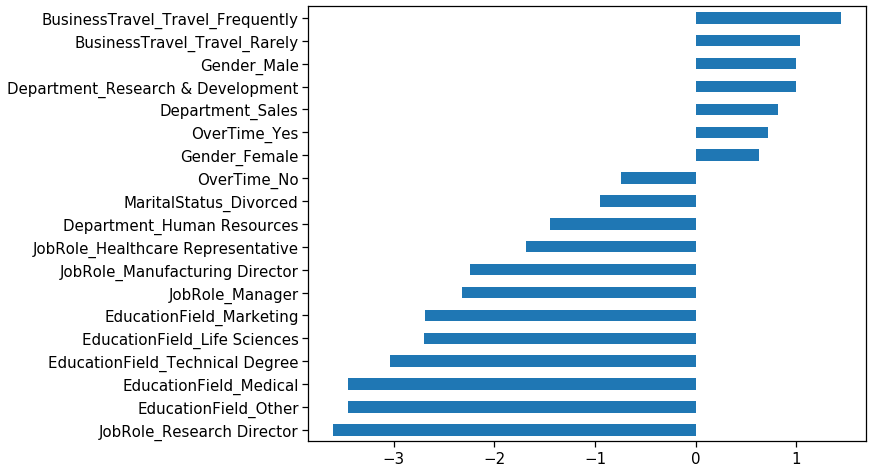

In [43]:
"""
Plotting feature importance for Logistic regression based on coefficients
"""
#print(logit_model.exog_names[:])

#print(result.params)
result.params = result.params.sort_values(axis=0)
log_params=dict(result.params)
log_params_colnames=log_params.keys()
log_params_coefficients=(x for x in log_params.values())

feat_importances = pd.Series(log_params_coefficients, index=log_params_colnames)
#Rank the 18 most important features (out of 51) as per Logistic Regression coefficients
#Matplotlib plot() function to plot bar graph of the 18 feature names and corresponding importance
feat_importances.plot(kind='barh', fontsize=15, figsize=(10,8)) # horizontal bar graph



# Comparing Accuracy of Both Algorithms

In [42]:
data = np.array([['','Logistic Regression','      Random Forest'],
                ['Test data',0.825,0.866],
                ['Training data (with SMOTE)',0.892,0.935],
                ['Training data (without SMOTE)',0.841,0.915]])

print(pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:]))
print('-'*120)


                              Logistic Regression       Random Forest
Test data                                   0.825               0.866
Training data (with SMOTE)                  0.892               0.935
Training data (without SMOTE)               0.841               0.915
------------------------------------------------------------------------------------------------------------------------


We were able to achieve desired 80% accuracy for both models, which can be improved later through parameter tuning.

Thus, we can see that **SMOTE helps in improving the training Accuracy for both models**, i.e. the models are able to tackle 'Yes' attrition cases too even though the original dataset had very few values for it.

Also, **model accuracy on test data is better for Random Forest than for Logistic Regression (86.6% vs 82.5%)**

# Comparing Feature Importances of Both Algorithms

### Random Forest
Assigns feature importances that are **useful to determine which features are most important for predicting attrition.**

Top 5 Important features:
* Overtime_No
* StockOptionLevel
* Monthly Income
* Years at Company
* JobSatisfaction

### Logistic Regression 
Tells us **whether the important features will lead towards 'Yes'** (positive coefficients) **or 'No'** (negative coefficients) **Attrition**

Top 5 Important features (+ve, that are associated with Yes attrition):
* BusinessTravel_Frequently
* BusinessTravel_Rarely
* Gender_Male
* Department_Research & Development
* Department_Sales

Top 5 Important features (-ve, that are associated with No attrition):
* JobRole_ResearchDirector
* EducationField_Other
* EducationField_Medical
* EducationField_TechnicalDegree
* JobRole_LifeSciences

Thus, logistic regression is able to tell us the *impact of the features on the attrition*, so we can convey the same to IBM in order to improve those features for the employees which have positive coefficients

# Additional Visualizations

      Age Attrition    Generation
0      41       Yes  Generation X
1      49        No  Generation X
2      37       Yes  Millennials 
3      33        No  Millennials 
4      27        No  Millennials 
...   ...       ...           ...
1465   36        No  Millennials 
1466   39        No  Millennials 
1467   27        No  Millennials 
1468   49        No  Generation X
1469   34        No  Millennials 

[1470 rows x 3 columns]


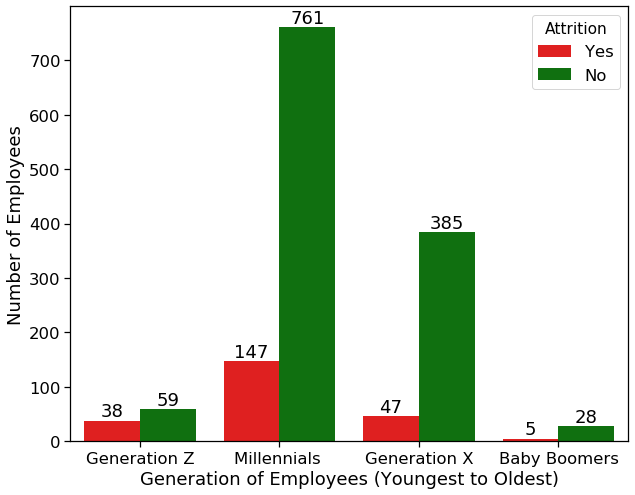

In [34]:
"""
Derived attribute visualization:

Generation-wise breakup of attrition

"""

generation_subset= attrition[['Age','Attrition']]

#Using pd.cut to group employees into Generations based on Age group
bins = [8, 24, 40, 56,75]
names = ['Generation Z', 'Millennials ', 'Generation X', 'Baby Boomers']
generation_subset['Generation'] = pd.cut(attrition['Age'], bins, labels=names)
print(generation_subset)

sns.set_context('notebook', font_scale = 1.5) 
plt.figure(figsize=(10,8))
#Histogram
c_plot = sns.countplot(x=generation_subset['Generation'], hue=generation_subset['Attrition'], data=generation_subset, palette=['#FF0000','#008000'])
c_plot.set(xlabel='Generation of Employees (Youngest to Oldest)', ylabel='Number of Employees')

#set labels for exact count of 'yes' and 'no' in each Generation
for p in c_plot.patches:
    c_plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')



**1. Derived 'Generation' attribute from given 'Age' for each employee, and studied Attrition class across Generations via grouped Histogram.**

This helped identify that Millenials in age group of 24-40 see most attrition, therefore this focus group either needs some drastic control measures if the organization wants to retain young talent, or they are prone to attrition due to unavoidable circumstances so IBM need not waste resources on them.

In [35]:
"""
Exploring WorkLifeBalance for Employees based on Marital Status

"""

fig = px.histogram(attrition, x="MaritalStatus", color="Attrition",
color_discrete_sequence=['#FF0000','#008000'],
histnorm = "percent", histfunc="count", category_orders={"MaritalStatus":["Single", "Married", "Divorced"], "WorkLifeBalance": [1,2,3,4]},
barmode="group", animation_frame="WorkLifeBalance"
# add the animation
)
# anchor the ranges so that the chart doesn't change frame to frame range_x=[0,generation_subset["Generation"].max()*1.1])
fig.update_layout(yaxis_title="Percentage of Employees")
fig.update_layout(xaxis_title="Marital Status of Employees")
plt.figure(figsize=(10,8))
fig.show()




<Figure size 720x576 with 0 Axes>

**2. Visualized work-life balance of employees based on Marital status of employees, to understand attrition and identify the focus groups for which the company can improve work life balance (as it is not feasible to improve for entire organization at one go)** 

This revealed that single people show attrition irrespective of work life balance rating. They probably find lot of opportunities outside, they will be open to taking risks, so tend to leave the company.

For married/divorced people, they will be at an advanced stage of lifecycle (wish to be more stable). They won't take risks of leaving easily. Even if worklifebalance is low, they may stay in the organization.

Thus, the company *can focus on improving the worklifebalance specifically for married people, they are more reliable in terms of loyalty to the company, so we should try and improve it for these employees and maybe that can favourably influence the employee's choice of leaving.*

In order to do the same, the company can introduce features like Overtime for unmarried, Millennial employees who would be able to balance heavy workloads and at the same time earn more monthly income.

# Conclusion


#### Through this project, we learnt
* How to tackle a business problem (HR Analytics) using data
* How to approach classification algorithm
* Implemented and Compared Random Forest and Logistic Regression algorithms
* Learnt the significance of feature selection, parameter tuning
* Used Minority oversampling, Recursive feature elimination concepts



# Future Work


1. We can explore more features in depth by creating additional visualizations
2. We can tune random forest, logistic regression parameters till we get better accuracy (provided trade-offs like bias and variance are accounted for)
3. Apart from accuracy, we can work towards improving recall for ‘Yes’ class of attrition
4. Apply algorithms like XGBooston same data, or use automated ML to find best model.